In [1]:
# Import the necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import numpy as np

In [2]:
# Read the data file
# NOTE: This assumes the data file is in the same folder as this script

df = pd.read_csv('Single-Family_ResidentialWaterUseDataSample.csv', header=12, sep=',',
                 index_col=0, parse_dates=True, infer_datetime_format=True, low_memory=False)

V_pulse        = 0.0087 #gallons
Delta_time     = 4.9    #seconds
df['Q_gpm']    = df['Pulse_Count']*V_pulse/Delta_time*60

C:\Users\labuser\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


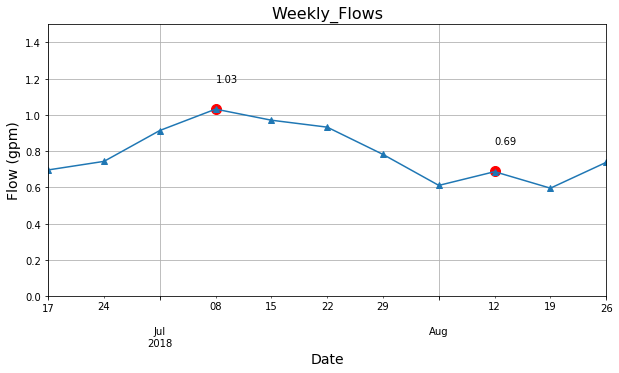


Global Maximum Flow is 1.03 gpm at the end of week 2018-07-08 00:00:00

Maximum Flows are:
DateTimeMST
2018-07-08    1.03
2018-08-12    0.69
Name: Q_gpm, dtype: float64

Done!


In [3]:
# Weekly Analysis 

#Determine the period of the analysis with a defined start and end of a week
beginDate = '2018-06-10 00:00:00'
endDate = '2018-08-26 23:59:59'
df_sub = df[beginDate:endDate]

#Aggregate Dataframe to weekly
weekly = df_sub['Q_gpm'].resample(rule='1W', base=0).mean()

#Convert Series Analysis to Dataframe
weeklydf = pd.DataFrame(data=weekly, index=weekly.index)

#Plot Weekly Analysis

fig = plt.figure(figsize=(10, 5))
plt.title('Weekly Flows', fontsize=16)

ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,1.5)
ax.set_ylabel('Flow (gpm)', fontsize=14)

weeklydf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Find Global Maximum
max_week_value = max(weekly)
max_week_date = weekly.index[weekly==max_week_value]

# Find and Print local Maiximum
loc_max = weekly[(weekly.shift(1) < weekly) & (weekly.shift(-1) < weekly)]
loc_max = round(loc_max, 2)

# Plot and Anotate Local Maiximum
plt.scatter(loc_max.index, loc_max, c='r', s=100)
for i, txt in enumerate(loc_max):
    ax.annotate(txt, (loc_max.index[i], loc_max[i]), xytext=(loc_max.index[i], loc_max[i]+0.15))

plt.show()

print ("\nGlobal Maximum Weekly Flow is "+ str(round(max_week_value,2)) + ' gpm at the end of week ' +  str(max_week_date[0]))
print ("\nMaximum Flows Weekly are:")
print(loc_max.head(100))

print ('\nDone!')

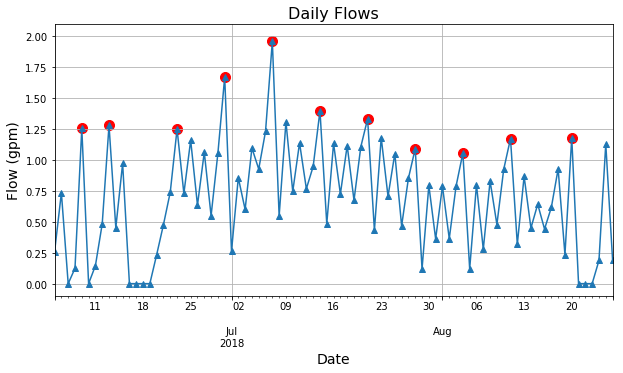


Average Daily Flow is 0.69 gpm

Global Maximum Daily Flow is 1.96 gpm at the end of week 2018-07-07 00:00:00

Maximum Daily Flows are:
DateTimeMST
2018-06-09    1.255442
2018-06-13    1.280084
2018-06-23    1.250626
2018-06-30    1.671908
2018-07-07    1.959460
2018-07-14    1.397548
2018-07-21    1.333166
2018-07-28    1.092135
2018-08-04    1.056214
2018-08-11    1.173660
2018-08-20    1.180390
Name: Q_gpm, dtype: float64


In [25]:
# Daily Analysis

# Determine the period of the analysis with a defined start and end of a day
beginDate = '2018-06-05 00:00:00'
endDate = '2018-08-26 23:59:59'
df_sub = df[beginDate:endDate]

# Aggregate data to daily data
daily = df_sub['Q_gpm'].resample(rule='24H', base=0).mean()
daily = daily.fillna(0)

#Convert Series Analysis to Dataframe
dailydf = pd.DataFrame(data=daily, index=daily.index)


# PLOT DAILY FLOWS

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)

dailydf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Find Global Mean
mean_day_value = np.mean(daily)

# Find Global Maximum
max_day_value = max(daily)
max_day_date = daily.index[daily==max_day_value]

# Find local peaks
Loc_max_d =  dailydf['Q_gpm'][(dailydf['Q_gpm'].shift(2) < dailydf['Q_gpm']) & (dailydf['Q_gpm'].shift(1) < dailydf['Q_gpm'])
                 & (dailydf['Q_gpm'].shift(-1) < dailydf['Q_gpm']) & (dailydf['Q_gpm'].shift(-2) < dailydf['Q_gpm'])]


plt.scatter(Loc_max_d.index, Loc_max_d, c='r', s=100)
plt.title('Daily Flows', fontsize=16)

plt.show()

print ("\nAverage Daily Flow is "+ str(round(mean_day_value,2)) + ' gpm')
print ("\nGlobal Maximum Daily Flow is "+ str(round(max_day_value,2)) + ' gpm at the end of week ' +  str(max_day_date[0]))
print ("\nMaximum Daily Flows are:")
print(Loc_max_d.head(100))

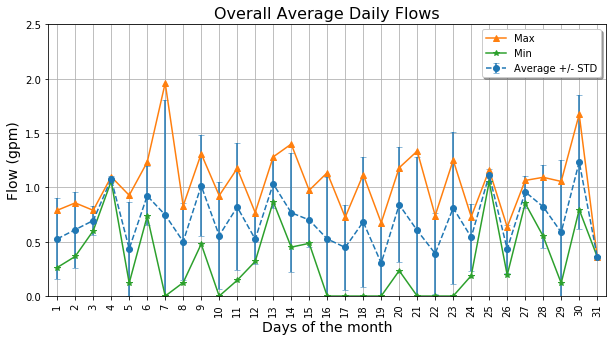


Average Daily Flow is 0.69 gpm

Most of Max and Min Flows are in the interval of +/- 1 STD
But it is not very important as our data set is less than three months

Done!


In [26]:
# Daily Analysis 2

# Do statistical Analysis over the whole period

dailyAvg = daily.groupby(dailydf.index.day).mean()
dailyMax = daily.groupby(dailydf.index.day).max()
dailyMin = daily.groupby(dailydf.index.day).min()
dailySTD = daily.groupby(dailydf.index.day).std()

# Generate a plot of the data with some indication of the variability in
#the daily average values (e.g., add error bars with +- one Std. Dev.)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,2.5)

plt.errorbar(x=dailyAvg.index, y=dailyAvg, yerr=dailySTD, capsize=3,
             capthick=0.5, fmt='--', label='Average +/- STD', marker='o')
dailyMax.plot(ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max')
dailyMin.plot(ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min')

# Set the limits on the x-axis and the tick
# mark locations

# Set the x and y-axis labels
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Days of the month', fontsize=14)
plt.xticks(rotation=90)
ax.set_xlim(0.5, 31.5)

xmarks = range(1, 31 + 1, 1)
plt.xticks(xmarks)
ax.grid(True)

# Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)

plt.title('Average Daily Flows', fontsize=16)

plt.show()

print ("\nAverage Daily Flow is "+ str(round(mean_day_value,2)) + ' gpm')
print ("\nMost of Max and Min Flows are in the interval of +/- 1 STD")
print ("But it is not very important as our data set is less than three months")
print ('\nDone!')

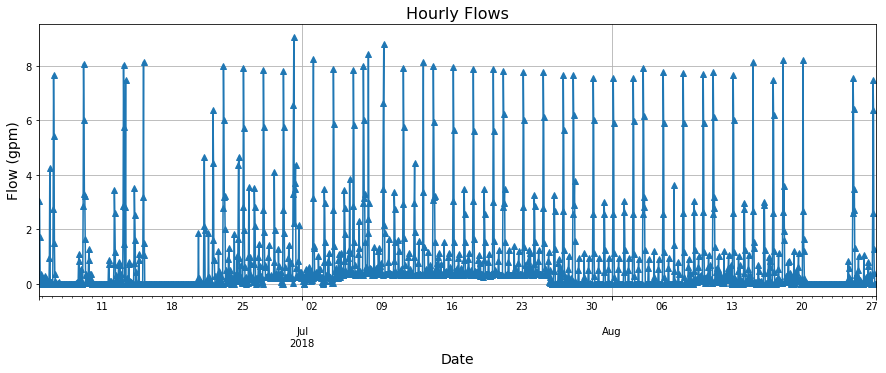

In [39]:
# Hourly Analysis n.1

# Determine the period of the analysis with a defined start and end of an hour

beginDate = '2018-06-04 15:00:00'
endDate = '2018-08-27 09:59:59'
df_sub = df[beginDate:endDate]

# Aggregate data to hourly data
hourly = df_sub['Q_gpm'].resample(rule='1H', base=0).mean()
hourly = hourly.fillna(0)

max_hour = max(hourly)
ts_max_hour = hourly.index[hourly==max_hour]


fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

hourly.plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

plt.title('Hourly Flows', fontsize=16)
plt.savefig('Hourly Flows')

plt.show()

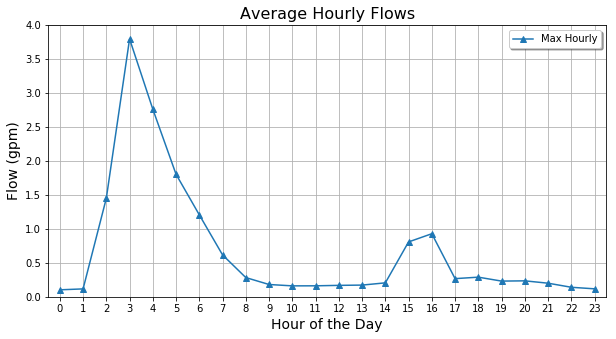

Average Daily Flow has 2 peaks:
First at at 3 am which reflect irrigation practice
Second peak at 4 pm which may be indoor uses or mixed between indoor and irrigation


In [48]:
# Hourly Analysis n.3

# Do statistical Analysis

hourlyAvg = hourly.groupby(hourly.index.hour).mean()

# Generate a plot of the data with some indication of the variability in
#the hourly average values (e.g., add error bars with +- one Std. Dev.)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,4)


hourlyAvg.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')


# Set the limits on the x-axis and the tick
# mark locations
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)

# Set the x and y-axis labels
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)
ax.grid(True)

# Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)

plt.title('Average Hourly Flows', fontsize=16)

plt.show()

print ('Average Daily Flow has 2 peaks:')
print ('First at at 3 am which reflect irrigation practice')
print ('Second peak at 4 pm which may be indoor uses or mixed between indoor and irrigation')



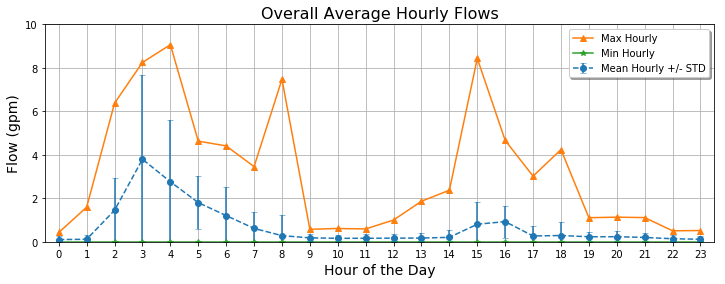

It is obvious that at 8am & 3pm, there is extreme events that gor far away from STD range
Also, from 4pm to 6pm there are also coniserable high events
And, 3 am is the largest STD range
Done!


In [52]:
# Hourly Analysis n.3

# Do statistical Analysis

hourlyAvg = hourly.groupby(hourly.index.hour).mean()
hourlyMax = hourly.groupby(hourly.index.hour).max()
hourlyMin = hourly.groupby(hourly.index.hour).min()
hourlySTD = hourly.groupby(hourly.index.hour).std()

# Generate a plot of the data with some indication of the variability in
#the hourly average values (e.g., add error bars with +- one Std. Dev.)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,10)

plt.errorbar(x=hourlyAvg.index, y=hourlyAvg, yerr=hourlySTD, capsize=3,
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

# Set the limits on the x-axis and the tick
# mark locations
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)

# Set the x and y-axis labels
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)
ax.grid(True)

# Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)

plt.title('Overall Average Hourly Flows', fontsize=16)

plt.show()

print ('It is obvious that at 8am & 3pm, there is extreme events that gor far away from STD range')
print ('Also, from 4pm to 6pm there are also coniserable high events')
print ('And, 3 am is the largest STD range')

print ('Done!')

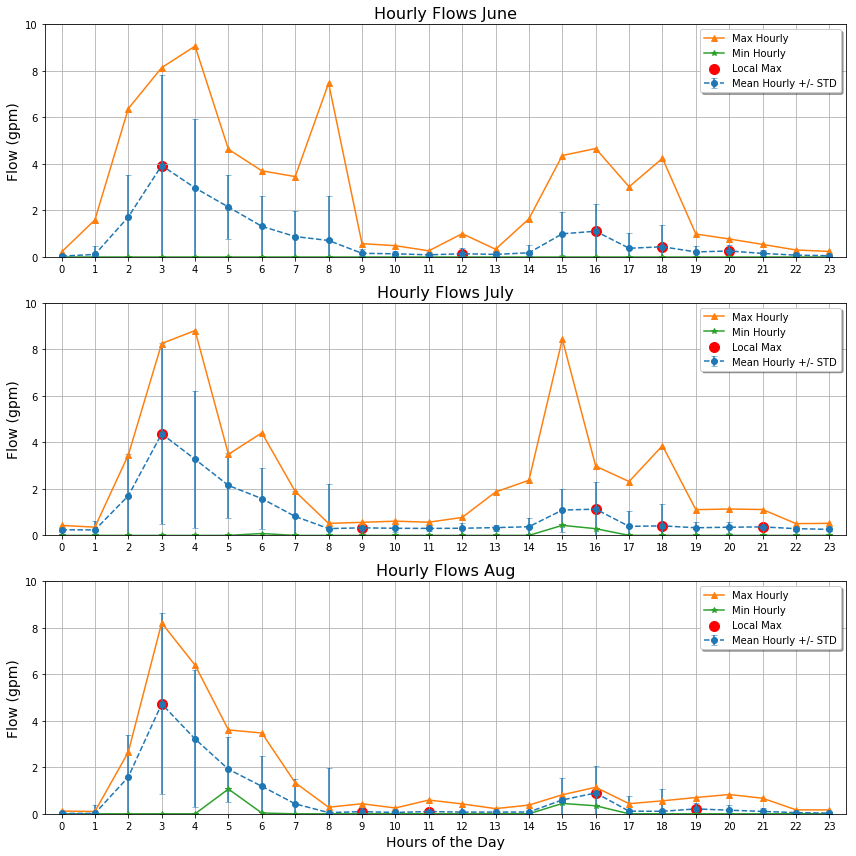

Done!


In [54]:
# Hourly Analysis no.4

# Select a day's worth of data
beginDate = '2018-06-04 15:00:00'
endDate   = '2018-06-30 23:59:59'
df_June   = df[beginDate:endDate]
beginDate = '2018-07-01 00:00:00'
endDate   = '2018-07-31 23:59:59'
df_July   = df[beginDate:endDate]
beginDate = '2018-08-01 00:00:00'
endDate   = '2018-08-27 09:59:59'
df_Aug    = df[beginDate:endDate]

hourly_df_June = df_June['Q_gpm'].resample(rule='1H', base=0).mean()
hourlyMean_June= hourly_df_June.groupby(hourly_df_June.index.hour).mean()
hourlyMax_June = hourly_df_June.groupby(hourly_df_June.index.hour).max()
hourlyMin_June = hourly_df_June.groupby(hourly_df_June.index.hour).min()
hourlySTD_June = hourly_df_June.groupby(hourly_df_June.index.hour).std()

hourly_df_July = df_July['Q_gpm'].resample(rule='1H', base=0).mean()
hourlyMean_July= hourly_df_July.groupby(hourly_df_July.index.hour).mean()
hourlyMax_July = hourly_df_July.groupby(hourly_df_July.index.hour).max()
hourlyMin_July = hourly_df_July.groupby(hourly_df_July.index.hour).min()
hourlySTD_July = hourly_df_July.groupby(hourly_df_July.index.hour).std()

hourly_df_Aug = df_Aug['Q_gpm'].resample(rule='1H', base=0).mean()
hourlyMean_Aug= hourly_df_Aug.groupby(hourly_df_Aug.index.hour).mean()
hourlyMax_Aug = hourly_df_Aug.groupby(hourly_df_Aug.index.hour).max()
hourlyMin_Aug = hourly_df_Aug.groupby(hourly_df_Aug.index.hour).min()
hourlySTD_Aug = hourly_df_Aug.groupby(hourly_df_Aug.index.hour).std()

fig = plt.figure(figsize=(12, 12))

#fig 1
ax = fig.add_subplot(3, 1, 1)
ax.set_ylim(0,10)
plt.title('Hourly Flows June', fontsize=16)

plt.errorbar(x=hourlyMean_June.index, y=hourlyMean_June, yerr=hourlySTD_June, capsize=3,
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax_June.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin_June.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

Loc_max = hourlyMean_June[(hourlyMean_June.shift(1) < hourlyMean_June) & (hourlyMean_June.shift(-1) < hourlyMean_June)]
plt.scatter(Loc_max.index, Loc_max, c='r', s=100, label='Local Max')

legend = ax.legend(loc='upper right', shadow=True, fontsize=10)
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('')

ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)

ax.grid(True)
fig.tight_layout()

#fig 2
ax = fig.add_subplot(3, 1, 2)
ax.set_ylim(0,10)
plt.title('Hourly Flows July', fontsize=16)

plt.errorbar(x=hourlyMean_July.index, y=hourlyMean_July, yerr=hourlySTD_June, capsize=3, 
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax_July.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin_July.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

Loc_max = hourlyMean_July[(hourlyMean_July.shift(1) < hourlyMean_July) & (hourlyMean_July.shift(-1) < hourlyMean_July)]
#print(Loc_max.head(100))
plt.scatter(Loc_max.index, Loc_max, c='r', s=100, label='Local Max')

legend = ax.legend(loc='upper right', shadow=True, fontsize=10)
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
ax.set_xlabel('')
ax.set_ylabel('Flow (gpm)', fontsize=14)
plt.xticks(xmarks)

ax.grid(True)
fig.tight_layout()

#fig 3
ax = fig.add_subplot(3, 1, 3)
ax.set_ylim(0,10)
plt.title('Hourly Flows Aug', fontsize=16)


plt.errorbar(x=hourlyMean_Aug.index, y=hourlyMean_Aug, yerr=hourlySTD_June, capsize=3, 
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax_Aug.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin_Aug.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

Loc_max = hourlyMean_Aug[(hourlyMean_Aug.shift(1) < hourlyMean_Aug) & (hourlyMean_Aug.shift(-1) < hourlyMean_Aug)]

plt.scatter(Loc_max.index, Loc_max, c='r', s=100, label='Local Max')

legend = ax.legend(loc='upper right', shadow=True, fontsize=10)

ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Hours of the Day', fontsize=14)
plt.xticks(xmarks)

ax.grid(True)
fig.tight_layout()

plt.savefig('Hourly Flows per month')
plt.show()
print ('Done!')